# Imports

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/krzychu12/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/krzychu12/nltk_data...


True

In [9]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('medium.csv')
data.head()

,Title,Text
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...


In [2]:
data.shape

(1391, 2)

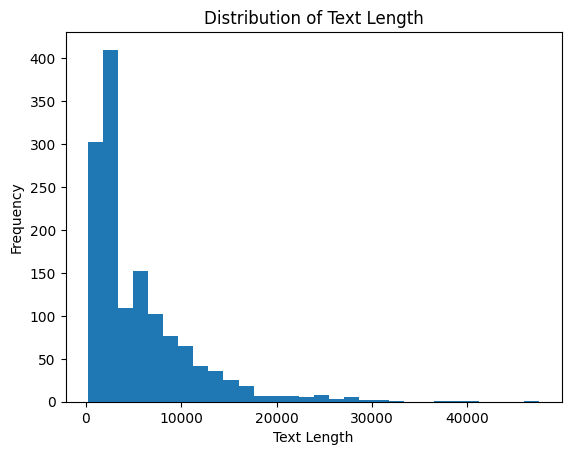

In [2]:
text_length = data['Text'].str.len()

plt.hist(text_length, bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

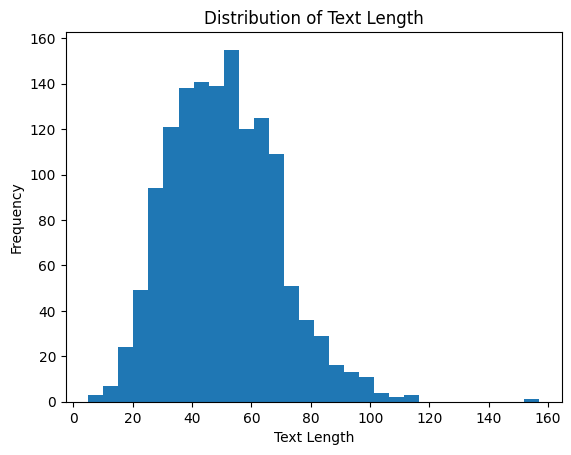

In [4]:
text_length = data['Title'].str.len()

plt.hist(text_length, bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

# Preprocessing

In [10]:
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))

def preprocess_text(text):  
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

lemmatizer = WordNetLemmatizer()

data['preprocessed_text'] = data['Text'].apply(preprocess_text)

/tmp/ipykernel_1660/1214099289.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['preprocessed_text'] = chunk['Text'].apply(preprocess_text)


In [11]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['preprocessed_text'])

# Retrieval

In [12]:
def retrieve_fragments(query, num_fragments=5): # indexing strategy
    query_vector = vectorizer.transform([preprocess_text(query)])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix)[0]
    top_indices = similarity_scores.argsort()[-num_fragments:][::-1]
    return data.loc[top_indices, 'Text'].tolist()

In [13]:
query = "machine learning"
fragments = retrieve_fragments(query)
print(len(fragments))
for fragment in fragments:
    print(fragment[:300])
    print("------------------------------------------")

5
By the end of the article you will be able to answer the following questions:

What is machine learning?

Why is machine learning so hot right now?

What is driving performance?

What are the challenges?

What’s going on in machine learning and energy today?

What might the future of energy and mach
------------------------------------------
The demand for machine learning systems has soared over the past few years. This is majorly due to the success of Machine Learning techniques in a wide range of applications. AutoML is fundamentally changing the face of ML-based solutions today by enabling people from diverse backgrounds to use mach
------------------------------------------
Should you buy the book?

Yes. But you don’t have to. You can read it first. But you should buy a copy, hold it, read it, sit it on your coffee table. Then when your friends ask, ‘What is machine learning?’, you’ll be able to tell them.

Who is the book for?

Maybe you’re studying data science. Or y
---------

# System Design Report

## Introduction
This report discusses the design of the system implemented in the Jupyter Notebook. The system utilizes various technologies and packages to perform data analysis and natural language processing tasks. The report also highlights the challenges encountered during the development process and suggests potential areas for future development.

## System Overview
The system consists of multiple cells in the Jupyter Notebook, each containing code blocks and markdown cells. The code blocks are executed independently, and the results are displayed in the output. The system utilizes the following technologies and packages:

- Pandas: Used for data manipulation and analysis.
- NLTK: Used for natural language processing tasks such as tokenization and stopwords removal.
- Scikit-learn: Used for machine learning and text retrieval tasks.
- Matplotlib: Used for data visualization.
- Jupyter Notebook: Used as the development environment.

## Design Decisions
The design of the system was based on the requirements of the tasks at hand. The use of Pandas was chosen for its powerful data manipulation capabilities, allowing easy handling of tabular data. NLTK was selected for its comprehensive set of natural language processing tools. Scikit-learn was chosen for its machine learning algorithms and text retrieval capabilities. Matplotlib was selected for its flexibility in creating visualizations. Jupyter Notebook was chosen as the development environment due to its interactive and collaborative features.

## Challenges Encountered
During the development process, several challenges were encountered. Some of the major challenges include:

- Data Preprocessing: Preprocessing the text data required careful handling of tokenization, stopwords removal, and other text cleaning tasks. Ensuring the accuracy and efficiency of these preprocessing steps was a challenge.
- Algorithm Selection: Choosing the appropriate machine learning algorithms and text retrieval techniques required a thorough understanding of the problem domain and the available options. Evaluating the performance of different algorithms was also a challenge.
- Visualization: Creating meaningful and informative visualizations required careful selection of the appropriate chart types and customization options. Ensuring the clarity and accuracy of the visualizations was a challenge.
- The most challenging was of course chunking text in some meaningful way

## Future Development
There are several potential areas for future development and improvement of the system. Some of the key areas include:
- further education in context of chunking methods and deeper data exploration

## Conclusions
The system implemented in the Jupyter Notebook provides a powerful platform for data analysis and natural language processing tasks. The use of Pandas, NLTK, Scikit-learn, and Matplotlib enables efficient data manipulation, text processing, machine learning, and visualization. Despite the challenges encountered during development, the system offers a solid foundation for future development and improvement. By addressing the suggested areas for future development, the system can be further enhanced to meet evolving requirements and deliver more advanced functionality.